<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/StockPricePredictionUsingRNN_LSTM_GRU(day27).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf

In [5]:
df = yf.download('AAPL', start='2021-01-01', end='2023-01-01')
df = df[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [7]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [9]:
from sklearn.model_selection import train_test_split

seq_length = 50
X, y = create_sequences(data, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    SimpleRNN(50, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - loss: 0.3804 - val_loss: 0.0120
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0128 - val_loss: 0.0093
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.

In [12]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inv, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predicted)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 15.927978599314194
Root Mean Squared Error (RMSE): 3.9909871710285154
Mean Absolute Error (MAE): 3.2455465295812593


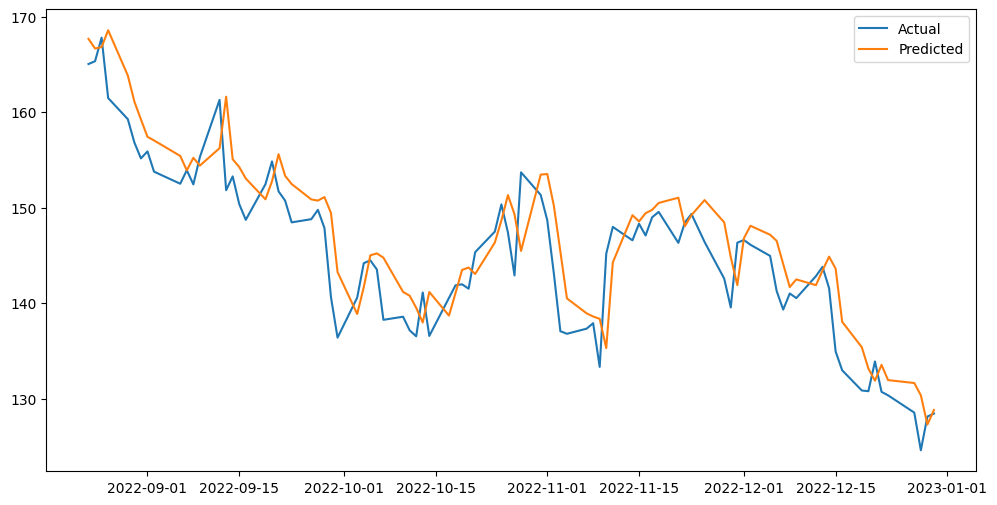

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual")
plt.plot(df.index[-len(predicted):], predicted, label="Predicted")
plt.legend()
plt.show()

# prediction using **GRUs**

In [17]:
df = yf.download('AAPL', start='2021-01-01', end='2023-01-01')
df = df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [18]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [19]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [20]:
seq_length = 50
X, y = create_sequences(data, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [21]:
from tensorflow.keras.layers import GRU

model = Sequential([
    GRU(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    GRU(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 0.2180 - val_loss: 0.0335
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0165 - val_loss: 0.0105
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0067 - val_loss: 0.0076
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - val_loss: 0.0068
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.

In [23]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step


In [24]:
mse = mean_squared_error(y_test_inv, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predicted)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 18.17510177160341
Root Mean Squared Error (RMSE): 4.263226685458259
Mean Absolute Error (MAE): 3.418556716415909


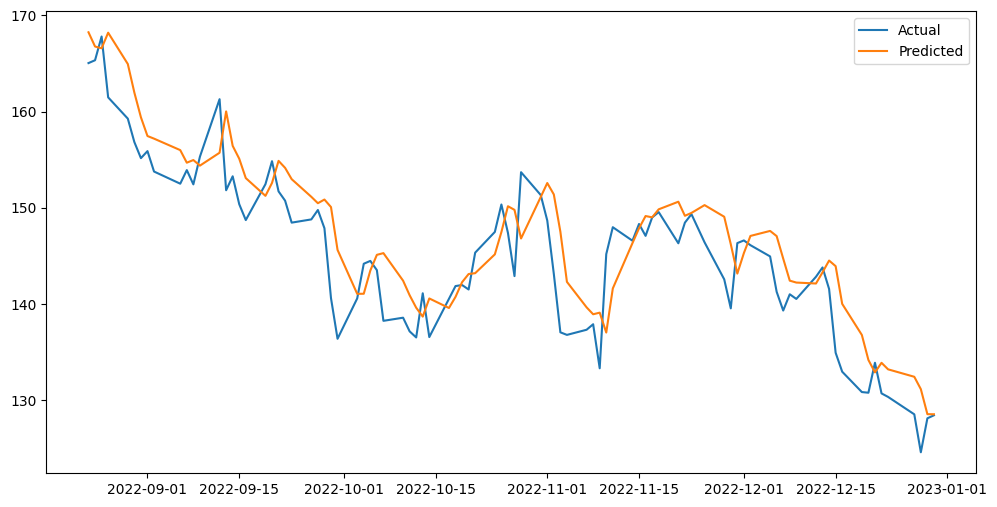

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual")
plt.plot(df.index[-len(predicted):], predicted, label="Predicted")
plt.legend()
plt.show()

# prediction using LSTM

In [26]:
df = yf.download('AAPL', start='2021-01-01', end='2023-01-01')
df = df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [27]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [28]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [29]:
seq_length = 50
X, y = create_sequences(data, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [30]:
from tensorflow.keras.layers import LSTM

model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - loss: 0.1800 - val_loss: 0.0080
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0169 - val_loss: 0.0078
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - val_loss: 0.0123
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0094 - val_loss: 0.0084
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - val_loss: 0.0159
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069 - val_loss: 0.0082
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0066 - val_loss: 0.0097
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057 - val_loss: 0.0080
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0062 - val_loss: 0.0082
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0052 - val_loss: 0.0077
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0

In [32]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step


In [33]:
mse = mean_squared_error(y_test_inv, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, predicted)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 40.1755792535234
Root Mean Squared Error (RMSE): 6.338420880118597
Mean Absolute Error (MAE): 5.314934447571472


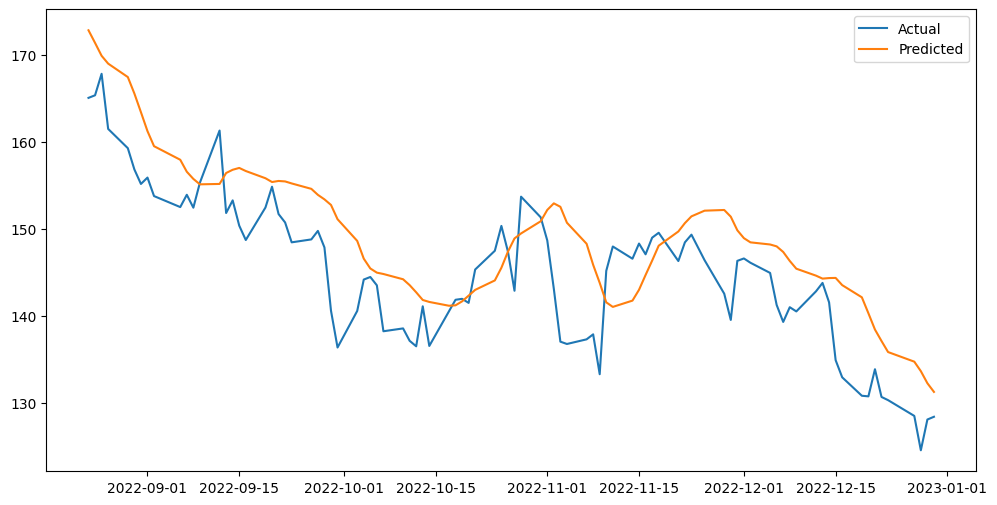

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual")
plt.plot(df.index[-len(predicted):], predicted, label="Predicted")
plt.legend()
plt.show()